Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import zscore

from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA

from yellowbrick.regressor import ResidualsPlot

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('avocado_clean.csv')
df.head()

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,region,year,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11


In [3]:
df_ = df.copy()

In [4]:
label_encoder = LabelEncoder() 
df_['type']= label_encoder.fit_transform(df_['type']) 
df_

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,region,year,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,Albany,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,Albany,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,Albany,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,Albany,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,Albany,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,WestTexNewMexico,2018,2
11534,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,WestTexNewMexico,2018,1
11535,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,WestTexNewMexico,2018,1
11536,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,WestTexNewMexico,2018,1


In [5]:
df_ = pd.get_dummies(data=df_, columns=['year', 'region', 'month'])
df_

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,...,0,0,0,0,0,0,0,0,0,0
11534,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,...,0,0,0,0,0,0,0,0,0,0
11535,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,...,0,0,0,0,0,0,0,0,0,0
11536,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = df_.iloc[:,1:]
y = df_[['averageprice']]
print(X.shape)
print(y.shape)

(11538, 79)
(11538, 1)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

Linear: -0.182007 (0.006115)
KNN: -0.180130 (0.005051)
DT: -0.142438 (0.003809)
RF: -0.105261 (0.002995)
GB: -0.160735 (0.004251)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


ADA: -0.210426 (0.003305)


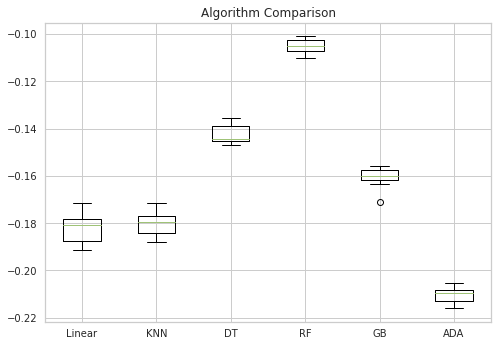

In [8]:
models = []
models.append(('Linear', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('ADA', AdaBoostRegressor()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [9]:
def regression_results(y_test, y_pred):
    explained_variance = explained_variance_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred) 
    mse = mean_squared_error(y_test, y_pred) 
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)

    print('Explained_variance: ', round(explained_variance, 2))    
    print('R2: ', round(r2, 2))
    print('Adjusted_r2: ', round(adjusted_r2, 2))
    print('MAE: ', round(mae, 2))
    print('MSE: ', round(mse, 2))
    print('RMSE: ', round(np.sqrt(mse), 2))

In [10]:
def model_accuracy(model, X_train=X_train, y_train= y_train):
    accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
    
    print('Accuracy: {:.2f} %'.format(accuracies.mean() * 100))
    print('Standard Deviation: {:.2f} %'.format(accuracies.std() * 100))

In [11]:
rf = RandomForestRegressor(random_state=43)

rf_params = {'bootstrap': [True, False],
             'max_depth': [20, 40, 60, 80],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [75, 100, 200, 500]}
    
rf_cv  = GridSearchCV(rf, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
rf_cv.best_params_

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [12]:
rf_tuning = RandomForestRegressor(**rf_cv.best_params_)

In [13]:
rf_tuning = rf_tuning.fit(X_train, y_train)

In [14]:
y_pred = rf_tuning.predict(X_test)

In [15]:
regression_results(y_test, y_pred)
model_accuracy(rf_tuning)

Explained_variance:  0.88
R2:  0.88
Adjusted_r2:  0.87
MAE:  0.09
MSE:  0.02
RMSE:  0.13
Accuracy: 86.42 %
Standard Deviation: 0.74 %
